# Fitness Tracker Survival Analysis
Created by: Andy Luc

## Business case:
1. What is the average amount of time that MyFitnessPal users use the app, and do they use it consistently throughout?
2. Do users still keep using the program after meeting or not meeting their goal?

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Exploratory Data Analysis

In [ ]:
# Reading the data file
raw_df = pd.read_csv('data/mfp-diaries.tsv',
                  sep='\t',
                  header=None,
                  names=['userId','diary_date','food_entries','daily_goal'])

### Pickled files:
To save processing time when loading into dataframe.

In [26]:
# raw_df.to_pickle('raw_df.pkl')
# total_goal.to_pickle('total_goal.pkl')
# combine_df.to_pickle('combine_df.pkl')
# survival.to_pickle('survival.pkl')

In [2]:
raw_df = pd.read_pickle('raw_df.pkl')

In [3]:
raw_df.head()

,userId,diary_date,food_entries,daily_goal
0,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2924}..."
1,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}..."
2,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}..."
3,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}..."
4,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}..."


In [4]:
#Number of unique users
len(raw_df['userId'].unique())

9896

### Parsing lists of dictionaries within *daily_goals* column

In [5]:
parse_df = raw_df.drop(['userId', 'diary_date','food_entries'], axis=1)

In [6]:
parse_df.head()

,daily_goal
0,"{""total"": [{""name"": ""Calories"", ""value"": 2924}..."
1,"{""total"": [{""name"": ""Calories"", ""value"": 2430}..."
2,"{""total"": [{""name"": ""Calories"", ""value"": 1862}..."
3,"{""total"": [{""name"": ""Calories"", ""value"": 2251}..."
4,"{""total"": [{""name"": ""Calories"", ""value"": 2001}..."


In [7]:
tg_dict = json.loads(parse_df['daily_goal'][0])
tg_dict

{'total': [{'name': 'Calories', 'value': 2924},
  {'name': 'Carbs', 'value': 340},
  {'name': 'Fat', 'value': 114},
  {'name': 'Protein', 'value': 186},
  {'name': 'Sodium', 'value': 3658},
  {'name': 'Sugar', 'value': 109}],
 'goal': [{'name': 'Calories', 'value': 3173},
  {'name': 'Carbs', 'value': 396},
  {'name': 'Fat', 'value': 105},
  {'name': 'Protein', 'value': 160},
  {'name': 'Sodium', 'value': 2300},
  {'name': 'Sugar', 'value': 119}]}

### Parse Functions

In [8]:
"""Creates list of keys and values from the first dictionary, and zips them together"""
def daily_totals(tg_dict):    
    total_cols = [list(tg_dict.keys())[0] + "_" + x['name'].lower() 
                  for x in tg_dict['total']]
    total_values = [y['value'] 
                  for y in tg_dict['total']]

    total_dict = {}
    for col, val in zip(total_cols, total_values):
        total_dict[col] = val
    return total_dict

"""Creates list of keys and values from the second dictionary, and zips them together"""
def daily_goals(tg_dict):
    goal_cols = [list(tg_dict.keys())[1] + "_" + k['name'].lower()
                 for k in tg_dict['goal']]
    goal_values = [i['value']
                 for i in tg_dict['goal']]
    
    goal_dict = {}
    for col, val in zip(goal_cols, goal_values):
        goal_dict[col] = val
    return goal_dict

"""Combines new keys and values for 'Total' and 'Goals' into single dictionary"""
def merge(dict1, dict2): 
    res = {**dict1, **dict2} 
    return res

"""Iterrates through entire parsed dataframe and appends merged rows"""
def final_parsed_dict():
    results = []
    for row in parse_df['daily_goal'].values:
        tg_dict = json.loads(row)
        results.append(merge(daily_goals(tg_dict), daily_totals(tg_dict)))
    return results

In [9]:
tg_parse = pd.DataFrame(final_parsed_dict())

In [10]:
tg_parse.head()

,goal_calcium,goal_calories,goal_carbs,goal_chol,goal_fat,goal_fiber,goal_iron,goal_mon fat,goal_ply fat,goal_potass.,...,total_mon fat,total_ply fat,total_potass.,total_protein,total_sat fat,total_sodium,total_sugar,total_trn fat,total_vit a,total_vit c
0,NaN,3173.0,396.0,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,186.0,NaN,3658.0,109.0,NaN,NaN,NaN
1,NaN,1572.0,196.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,50.0,NaN,855.0,63.0,NaN,NaN,NaN
2,NaN,1832.0,229.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,114.0,NaN,2215.0,100.0,NaN,NaN,NaN
3,NaN,1685.0,210.0,NaN,56.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,98.0,NaN,1765.0,105.0,NaN,NaN,NaN
4,NaN,1597.0,199.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,202.0,NaN,1101.0,71.0,NaN,NaN,NaN


In [11]:
con = pd.concat([raw_df, tg_parse], axis=1)

In [12]:
con.isna().sum()

userId                 0
diary_date             0
food_entries           0
daily_goal             0
goal_calcium      564262
goal_calories          7
goal_carbs         14145
goal_chol         568935
goal_fat           17859
goal_fiber        344347
goal_iron         558171
goal_mon fat      587096
goal_ply fat      586693
goal_potass.      567771
goal_protein        7321
goal_sat fat      570611
goal_sodium       196659
goal_sugar        218272
goal_trn fat      585359
goal_vit a        586413
goal_vit c        584701
total_calcium     564262
total_calories        26
total_carbs        14146
total_chol        568935
total_fat          17866
total_fiber       344349
total_iron        558171
total_mon fat     586759
total_ply fat     586426
total_potass.     567771
total_protein       7331
total_sat fat     570611
total_sodium      196660
total_sugar       218270
total_trn fat     585359
total_vit a       586413
total_vit c       584701
dtype: int64

In [13]:
total_goal = con.drop(['food_entries','daily_goal','goal_calcium','goal_chol',
                       'goal_iron','goal_mon fat','goal_ply fat','goal_potass.',
                       'goal_sat fat','goal_trn fat','goal_vit a','goal_vit c',
                       'total_calcium','total_chol','total_iron','total_mon fat',
                       'total_ply fat','total_potass.','total_sat fat','total_trn fat',
                       'total_vit a','total_vit c'], axis=1)

In [14]:
total_goal.fillna(0, inplace=True)

In [15]:
total_goal['diary_date'] = pd.to_datetime(total_goal['diary_date'])

In [16]:
total_goal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587187 entries, 0 to 587186
Data columns (total 16 columns):
userId            587187 non-null int64
diary_date        587187 non-null datetime64[ns]
goal_calories     587187 non-null float64
goal_carbs        587187 non-null float64
goal_fat          587187 non-null float64
goal_fiber        587187 non-null float64
goal_protein      587187 non-null float64
goal_sodium       587187 non-null float64
goal_sugar        587187 non-null float64
total_calories    587187 non-null float64
total_carbs       587187 non-null float64
total_fat         587187 non-null float64
total_fiber       587187 non-null float64
total_protein     587187 non-null float64
total_sodium      587187 non-null float64
total_sugar       587187 non-null float64
dtypes: datetime64[ns](1), float64(14), int64(1)
memory usage: 71.7 MB


## Labeling New Columns:
Create 1 column per dictionary in both total key and goal key

- total
    + total_calories
    + total_carbs
    + total_fat
    + total_fiber
    + total_protein
    + total_sodium
    + total_sugar
- goal
    + goal_calories
    + goal_carbs
    + goal_fat
    + goal_fiber
    + goal_protein
    + goal_sodium
    + goal_sugar


- **total_sum**: Total sum of input values for the day
- **goal_sum**: Total sum of goal values for the day
- **achievement**: Indicates whether or not a user has met their daily goal within a tolerance of 10%.
    - 1 = Succeed
    - 0 = Fail

In [17]:
nutrients = ['calories','carbs','fat','fiber','protein','sodium','sugar']

total_s = []
goal_s = []
for nutrient in nutrients:
    total_s.append(f'total_{nutrient}')
    goal_s.append(f'goal_{nutrient}')

In [18]:
total_goal['total_sum'] = total_goal[total_s].apply(np.sum, axis=1)

total_goal['goal_sum'] = total_goal[goal_s].apply(np.sum, axis=1)

total_goal['achievement'] = np.where(abs((total_goal['total_sum'] - 
                                          total_goal['goal_sum']) / 
                                          total_goal['goal_sum']) <= 0.1, 1, 0)

In [ ]:
total_goal = pd.read_pickle('total_goal.pkl')

In [20]:
total_goal.head()

,userId,diary_date,goal_calories,goal_carbs,goal_fat,goal_fiber,goal_protein,goal_sodium,goal_sugar,total_calories,total_carbs,total_fat,total_fiber,total_protein,total_sodium,total_sugar,total_sum,goal_sum,achievement
0,1,2014-09-14,3173.0,396.0,105.0,0.0,160.0,2300.0,119.0,2924.0,340.0,114.0,0.0,186.0,3658.0,109.0,7331.0,6253.0,0
1,1,2014-09-15,1572.0,196.0,52.0,0.0,79.0,2300.0,59.0,2430.0,96.0,37.0,0.0,50.0,855.0,63.0,3531.0,4258.0,0
2,1,2014-09-16,1832.0,229.0,61.0,0.0,92.0,2300.0,69.0,1862.0,158.0,54.0,0.0,114.0,2215.0,100.0,4503.0,4583.0,1
3,1,2014-09-17,1685.0,210.0,56.0,0.0,85.0,2300.0,63.0,2251.0,187.0,60.0,0.0,98.0,1765.0,105.0,4466.0,4399.0,1
4,1,2014-09-18,1597.0,199.0,53.0,0.0,80.0,2300.0,60.0,2001.0,113.0,81.0,0.0,202.0,1101.0,71.0,3569.0,4289.0,0


In [21]:
coll = total_goal.drop(['userId','diary_date','goal_calories','goal_carbs',
                        'goal_fat','goal_fiber','goal_protein','goal_sodium',
                        'goal_sugar','total_sum','goal_sum'], axis=1)

Text(0.5, 1.0, 'Multi-Collinearity of Attributes')

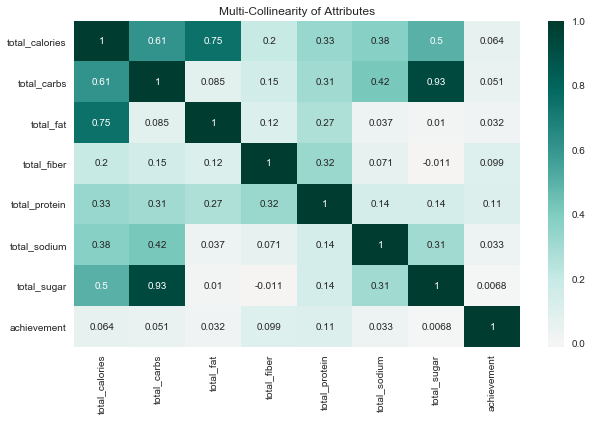

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(coll.corr(), center=0, cmap='BrBG', annot=True)

ax.set_title('Multi-Collinearity of Attributes')

## Survival Analysis

In [23]:
days = total_goal['userId'].value_counts().sort_index()
days = pd.DataFrame(days).rename(columns={'userId': 'days'})
days.head()

,days
1,174
2,60
3,7
4,27
5,179


In [24]:
cols = total_goal.drop(['userId','diary_date'], axis=1).columns

condense = total_goal.groupby(['userId'])[cols].sum()

combine_df = pd.merge(days, condense, left_index=True, right_index=True)

In [25]:
combine_df.head()

,days,goal_calories,goal_carbs,goal_fat,goal_fiber,goal_protein,goal_sodium,goal_sugar,total_calories,total_carbs,total_fat,total_fiber,total_protein,total_sodium,total_sugar,total_sum,goal_sum,achievement
1,174,375085.0,46633.0,12472.0,0.0,19029.0,400200.0,14076.0,401750.0,32265.0,13562.0,0.0,22408.0,360487.0,14227.0,844699.0,867495.0,68
2,60,90925.0,11387.0,2955.0,0.0,4714.0,138000.0,3422.0,87430.0,10872.0,2537.0,0.0,2550.0,100217.0,4573.0,208179.0,251403.0,11
3,7,9438.0,1178.0,312.0,196.0,469.0,16100.0,0.0,11969.0,811.0,267.0,120.0,323.0,10156.0,0.0,23646.0,27693.0,2
4,27,44211.0,5524.0,1464.0,0.0,2223.0,62100.0,0.0,24636.0,2682.0,1001.0,0.0,1153.0,40061.0,0.0,69533.0,115522.0,4
5,179,572414.0,0.0,15948.0,7564.0,35677.0,411700.0,21485.0,536631.0,0.0,13818.0,6305.0,33720.0,358700.0,21707.0,970881.0,1064788.0,58


### Setting up Dataframe for Survival Analysis
Transform all the nutrient columns to whether or not the users' total consumption is within 10% of the goal amount.

In [ ]:
combine_df = pd.read_pickle('combine_df.pkl')

In [27]:
nutrients = ['calories','carbs','fat','fiber','protein','sodium','sugar']

for nutrient in nutrients:
    total = combine_df[f'total_{nutrient}']
    goal = combine_df[f'goal_{nutrient}']
    combine_df[f'{nutrient}_10_pct'] = np.where(abs((total - goal) / goal) <= 0.1, 1, 0)

In [28]:
x = ['goal_calories','goal_carbs','goal_fat','goal_fiber','goal_protein',
     'goal_sodium','goal_sugar','total_calories','total_carbs','total_fat',
     'total_fiber','total_protein','total_sodium','total_sugar','total_sum','goal_sum']

survival_df = combine_df.drop(x, axis=1)

In [29]:
survival_df.head()

,days,achievement,calories_10_pct,carbs_10_pct,fat_10_pct,fiber_10_pct,protein_10_pct,sodium_10_pct,sugar_10_pct
1,174,68,1,0,1,0,0,1,1
2,60,11,1,1,0,0,0,0,0
3,7,2,0,0,0,0,0,0,0
4,27,4,0,0,0,0,0,0,0
5,179,58,1,0,0,0,1,0,1


### 14 day Churn:

In [30]:
from lifelines import CoxPHFitter, KaplanMeierFitter
from sklearn.model_selection import train_test_split

In [31]:
survival_df['14day_churn'] = np.where(survival_df['days'] <= 14, 1, 0)

In [32]:
survival_df.head()

,days,achievement,calories_10_pct,carbs_10_pct,fat_10_pct,fiber_10_pct,protein_10_pct,sodium_10_pct,sugar_10_pct,14day_churn
1,174,68,1,0,1,0,0,1,1,0
2,60,11,1,1,0,0,0,0,0,0
3,7,2,0,0,0,0,0,0,0,1
4,27,4,0,0,0,0,0,0,0,0
5,179,58,1,0,0,0,1,0,1,0


In [33]:
cph = CoxPHFitter()
fourteen_days = cph.fit(survival_df, duration_col='days', event_col='14day_churn')
fourteen_days.print_summary()

<lifelines.CoxPHFitter: fitted with 9896 observations, 7262 censored>
      duration col = 'days'
         event col = '14day_churn'
number of subjects = 9896
  number of events = 2634
partial log-likelihood = -20570.27
  time fit was run = 2019-07-01 17:41:07 UTC

---
                 coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
achievement     -0.69      0.50      0.02 -42.17 <0.005       inf       -0.72       -0.66
calories_10_pct  0.44      1.56      0.07   6.51 <0.005     33.65        0.31        0.58
carbs_10_pct     0.19      1.21      0.08   2.48   0.01      6.26        0.04        0.34
fat_10_pct       0.24      1.27      0.06   3.92 <0.005     13.45        0.12        0.36
fiber_10_pct     0.51      1.66      0.17   3.00 <0.005      8.54        0.18        0.84
protein_10_pct   0.23      1.26      0.08   2.99 <0.005      8.48        0.08        0.39
sodium_10_pct    0.54      1.72      0.08   6.67 <0.005     35.23        0.38        0.70
sugar_10_p

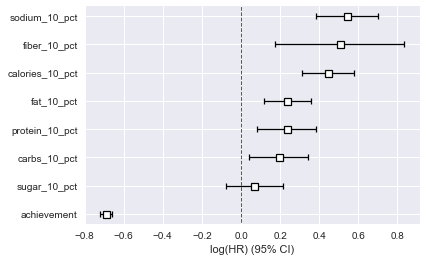

In [34]:
fourteen_days.plot()

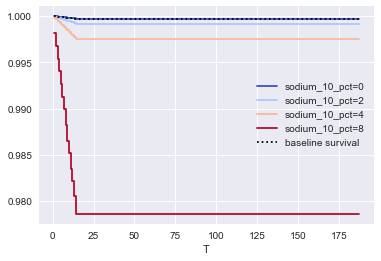

In [35]:
cph.plot_covariate_groups('sodium_10_pct', [0, 2, 4, 8], cmap='coolwarm')

### 45 day Churn:

In [36]:
survival_df['45day_churn'] = np.where(survival_df['days'] <= 45, 1, 0)
survival_df = survival_df.drop(['14day_churn'], axis=1)
survival_df.head()

,days,achievement,calories_10_pct,carbs_10_pct,fat_10_pct,fiber_10_pct,protein_10_pct,sodium_10_pct,sugar_10_pct,45day_churn
1,174,68,1,0,1,0,0,1,1,0
2,60,11,1,1,0,0,0,0,0,0
3,7,2,0,0,0,0,0,0,0,1
4,27,4,0,0,0,0,0,0,0,1
5,179,58,1,0,0,0,1,0,1,0


In [37]:
fortyfive_days = cph.fit(survival_df, duration_col='days', event_col='45day_churn')
fortyfive_days.print_summary()

<lifelines.CoxPHFitter: fitted with 9896 observations, 4713 censored>
      duration col = 'days'
         event col = '45day_churn'
number of subjects = 9896
  number of events = 5183
partial log-likelihood = -41253.04
  time fit was run = 2019-07-01 17:41:45 UTC

---
                 coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
achievement     -0.29      0.75      0.00 -59.96 <0.005       inf       -0.30       -0.28
calories_10_pct  0.33      1.39      0.05   7.06 <0.005     39.13        0.24        0.43
carbs_10_pct     0.15      1.17      0.05   3.03 <0.005      8.68        0.05        0.25
fat_10_pct       0.26      1.30      0.04   6.61 <0.005     34.56        0.19        0.34
fiber_10_pct     0.23      1.26      0.12   1.99   0.05      4.43        0.00        0.46
protein_10_pct   0.22      1.25      0.05   4.12 <0.005     14.70        0.12        0.32
sodium_10_pct    0.61      1.84      0.05  11.66 <0.005    101.91        0.51        0.72
sugar_10_p

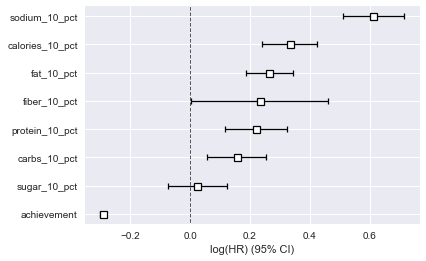

In [38]:
fortyfive_days.plot()

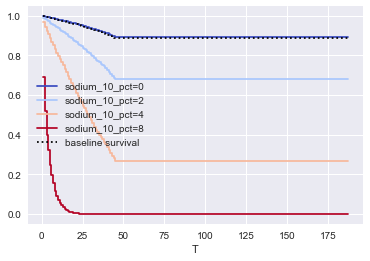

In [39]:
cph.plot_covariate_groups('sodium_10_pct', [0, 2, 4, 8], cmap='coolwarm')

### 90 day Churn:

In [40]:
survival_df['90day_churn'] = np.where(survival_df['days'] <= 90, 1, 0)
survival_df = survival_df.drop(['45day_churn'], axis=1)
survival_df.head()

,days,achievement,calories_10_pct,carbs_10_pct,fat_10_pct,fiber_10_pct,protein_10_pct,sodium_10_pct,sugar_10_pct,90day_churn
1,174,68,1,0,1,0,0,1,1,0
2,60,11,1,1,0,0,0,0,0,1
3,7,2,0,0,0,0,0,0,0,1
4,27,4,0,0,0,0,0,0,0,1
5,179,58,1,0,0,0,1,0,1,0


In [41]:
ninety_days = cph.fit(survival_df, duration_col='days', event_col='90day_churn')
ninety_days.print_summary()

<lifelines.CoxPHFitter: fitted with 9896 observations, 2538 censored>
      duration col = 'days'
         event col = '90day_churn'
number of subjects = 9896
  number of events = 7358
partial log-likelihood = -59136.16
  time fit was run = 2019-07-01 17:41:51 UTC

---
                 coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
achievement     -0.15      0.86      0.00 -67.24 <0.005       inf       -0.15       -0.14
calories_10_pct  0.29      1.34      0.04   7.77 <0.005     46.80        0.22        0.36
carbs_10_pct     0.09      1.09      0.04   2.18   0.03      5.09        0.01        0.17
fat_10_pct       0.27      1.31      0.03   8.29 <0.005     53.00        0.20        0.33
fiber_10_pct     0.18      1.20      0.09   2.02   0.04      4.53        0.01        0.36
protein_10_pct   0.17      1.18      0.04   3.76 <0.005     12.54        0.08        0.26
sodium_10_pct    0.49      1.63      0.04  11.86 <0.005    105.29        0.41        0.57
sugar_10_p

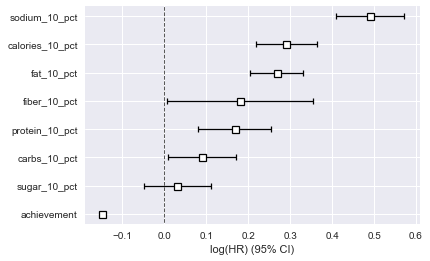

In [42]:
ninety_days.plot()

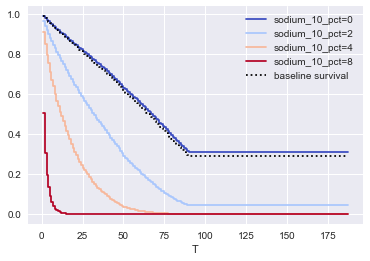

In [43]:
cph.plot_covariate_groups('sodium_10_pct', [0, 2, 4, 8], cmap='coolwarm')

## Time Series Analysis

In [ ]:
total_goal_df.head()

In [ ]:
irrelevant = ['goal_calories','goal_carbs','goal_fat','goal_fiber','goal_protein',
              'goal_sodium','goal_sugar','total_calories','total_carbs','total_fat',
              'total_fiber','total_protein','total_sodium','total_sugar','achievement']

time_df = total_goal_df.drop(irrelevant, axis=1)

In [ ]:
time_df.head()

In [ ]:
time_df['tg_diff'] = round(abs((time_df['total_sum'] - time_df['goal_sum'])/time_df['goal_sum']), 3)

In [ ]:
# time_df['tg_diff'] = pd.Series(["{0:.2f}%".format(val * 100) for val in time_df['tg_diff']])

In [ ]:
time_df = time_df.drop(['total_sum','goal_sum'], axis=1)

In [ ]:
time_df.set_index('diary_date', inplace=True)

In [ ]:
time_df.head()

In [ ]:
new_time_df = pd.DataFrame(time_df[(time_df['userId']==1)|(time_df['userId']==2)])

In [ ]:
new_time_df.head()

In [ ]:
by_label = new_time_df.groupby('userId')

for name, group in by_label:
    plt.plot(group['tg_diff'], label=name)

plt.legend()
plt.show()

## Logistic Regression

In [ ]:
combine_df = pd.read_pickle('combine_df.pkl')
combine_df.head()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score

In [ ]:
#Setting X and y variables, then Train Test Split
X = combine_df.drop(['days','goal_sum','total_sum','goal_calories','goal_carbs',
                     'goal_fat','goal_fiber','goal_protein','goal_sodium','goal_sugar'], 
                      axis=1)
y = combine_df.achievement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
loreg = LogisticRegression(solver='lbfgs', max_iter=1000)
loreg.fit(X_train, y_train)
loreg_preds = loreg.predict(X_test)

In [ ]:
def print_metrics(y, loreg_preds):
    print("Precision Score: {}".format(precision_score(y, loreg_preds)))
    print("Recall Score: {}".format(recall_score(y, loreg_preds)))
    print("Accuracy Score: {}".format(accuracy_score(y, loreg_preds)))
    print("F1 Score: {}".format(f1_score(y, loreg_preds)))
    
print_metrics(y_test, loreg_preds)

In [ ]:
# json_dict.keys()[0]
# Gives Error: 'dict_keys' object does not support indexing, hence needs to be set to a list to iterate.

In [ ]:
# df = pd.DataFrame([[1, 4],
#                    [2, 5],
#                    [3, 6]],
#                   columns=["a", "b"])
# df

In [ ]:
# df["c"] = df.apply(np.sum, axis=1)
# df